In [628]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [629]:
f2 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/CH_2021.csv")

In [630]:
f2

,Date,CH
0,3/26/2021,0.000000
1,3/27/2021,0.000667
2,3/28/2021,0.001333
3,3/29/2021,0.002000
4,3/30/2021,0.002667
...,...,...
111,7/15/2021,0.690000
112,7/16/2021,0.700000
113,7/17/2021,0.710000
114,7/18/2021,0.720000


In [631]:
f2['Date'] = pd.to_datetime(f2['Date'])

In [632]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [633]:
data2 = f2[0:98].copy()

In [634]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [635]:
data2.drop(['Date'], axis = 1,inplace = True)

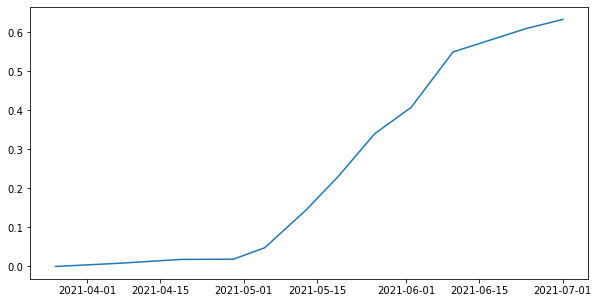

In [636]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['CH'])

In [496]:
data2['CH_log'] = np.cbrt(data2['CH'])
data2['CH_log_1'] = data2['CH_log'].diff().diff()

In [30]:
# Diff by 1 value
data2['CH_log_1'] = data2['CH'].diff()

In [637]:
# Diff by 2 value
data2['CH_log_1'] = data2['CH'].diff().diff()

In [445]:
# Diff by 2 values (log)
data2['CH_log'] = np.log(data2['CH']).diff()
#data2['CH_log_1'] = data2['CH_log'].diff().diff()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [346]:
# Diff by 1 value (log)
data2['CH_log'] = np.log(data2['CH'])
data2['CH_log_1'] = np.log(data2['CH_log']).diff()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [405]:
# Log and take difference of log
data2['CH_log'] = np.log(data2['CH'])
data2['CH_log_1'] = data2['CH_log'] - data2['CH_log'].diff()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [616]:
data2

,CH,CH_log_1
Date,,
2021-03-26,0.000000,NaN
2021-03-27,0.000667,NaN
2021-03-28,0.001333,-1.000000e-09
2021-03-29,0.002000,1.000000e-09
2021-03-30,0.002667,0.000000e+00
...,...,...
2021-06-27,0.620000,-9.999999e-10
2021-06-28,0.623333,0.000000e+00
2021-06-29,0.626667,9.999999e-10


In [638]:
ad_fuller_result = adfuller(data2['CH_log_1'].dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -9.645233286885478
p-value: 1.483936906245502e-16


In [639]:
data2 = data2.dropna()

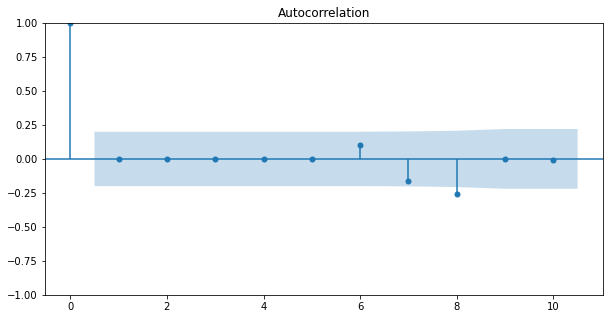

In [640]:
sm.graphics.tsa.plot_acf(data2['CH_log_1'].values.squeeze(), lags=10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


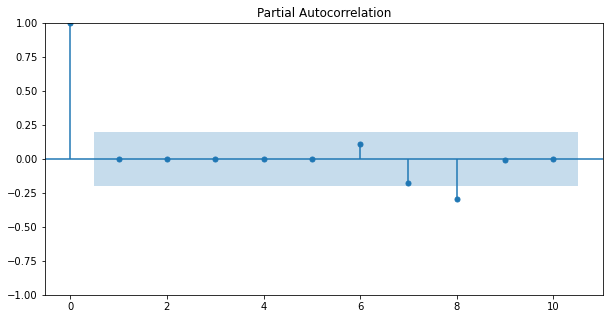

In [641]:
sm.graphics.tsa.plot_pacf(data2['CH_log_1'].values.squeeze(), lags=10)
plt.show()

In [642]:
train_data_1 = data2['CH']
train_data_1

Date
2021-03-28    0.001333
2021-03-29    0.002000
2021-03-30    0.002667
2021-03-31    0.003333
2021-04-01    0.004000
                ...   
2021-06-27    0.620000
2021-06-28    0.623333
2021-06-29    0.626667
2021-06-30    0.630000
2021-07-01    0.633571
Name: CH, Length: 96, dtype: float64

In [643]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_1, order = (0,2,0))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [644]:
model_pred = model_fit.forecast(steps = 18)
model_pred

2021-07-02    0.637143
2021-07-03    0.640714
2021-07-04    0.644286
2021-07-05    0.647857
2021-07-06    0.651429
2021-07-07    0.655000
2021-07-08    0.658571
2021-07-09    0.662143
2021-07-10    0.665714
2021-07-11    0.669286
2021-07-12    0.672857
2021-07-13    0.676429
2021-07-14    0.680000
2021-07-15    0.683571
2021-07-16    0.687143
2021-07-17    0.690714
2021-07-18    0.694286
2021-07-19    0.697857
Freq: D, Name: predicted_mean, dtype: float64

In [645]:
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     CH   No. Observations:                   96
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 451.945
Date:                Tue, 16 Aug 2022   AIC                           -901.889
Time:                        14:41:58   BIC                           -899.346
Sample:                    03-28-2021   HQIC                          -900.862
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        3.9e-06   1.51e-07     25.763      0.000     3.6e-06     4.2e-06
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2802.13
Prob(Q):                              1.00   Pr

In [646]:
test_data = f2['CH'].iloc[98:116]

In [647]:
test_data

98     0.637143
99     0.640714
100    0.644286
101    0.647857
102    0.651429
103    0.655000
104    0.658571
105    0.662143
106    0.665714
107    0.669286
108    0.672857
109    0.676429
110    0.680000
111    0.690000
112    0.700000
113    0.710000
114    0.720000
115    0.730000
Name: CH, dtype: float64

In [648]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data, model_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.011


In [650]:
model_pred.to_csv('98_day_2021_CH.csv')